In [1]:
import time
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

tf.__version__

'2.0.1'

In [2]:
display_step = 100
learning_rate = 0.001
epochs = 1000

In [3]:
data = pd.read_csv("data/birth_rate.csv")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [4]:
# Split data/labels
data_X = np.array(data['Birth rate'])
data_Y = np.array(data['Life expectancy'])

In [5]:
# Weight and Bias

w = tf.Variable(tf.zeros(1), name="weight")
b = tf.Variable(tf.zeros(1), name="bias")

def predict(x):
    return x * w + b

def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

# SGD Optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [6]:
history = []
start = time.time()

# Start training
for epoch in range(1, epochs + 1):
    
    # Begin GradientTape and optimise
    with tf.GradientTape() as g:
        pred = predict(data_X)
        loss = mse(data_Y, pred)

    # Compute dw, db
    gradients = g.gradient(loss, [w,b])
    
    # Update w and b
    optimizer.apply_gradients(zip(gradients, [w,b]))
    
    # Monitor training / display steps
    if epoch % display_step == 0:
        pred = predict(data_X)
        loss = mse(pred, data_Y)
        history.append(np.array(w * data_X + b))
        print("Epoch: %i, Loss: %f, w: %f, b: %f" % (epoch, loss, w.numpy(), b.numpy()))
print('Train Time: %f seconds' %(time.time() - start))

Epoch: 100, Loss: 652.589386, w: 10.311912, b: 30.239805
Epoch: 200, Loss: 324.813042, w: 5.310023, b: 47.548641
Epoch: 300, Loss: 169.670615, w: 1.868819, b: 59.456791
Epoch: 400, Loss: 96.238810, w: -0.498666, b: 67.649384
Epoch: 500, Loss: 61.482203, w: -2.127455, b: 73.285736
Epoch: 600, Loss: 45.031348, w: -3.248024, b: 77.163422
Epoch: 700, Loss: 37.244803, w: -4.018959, b: 79.831215
Epoch: 800, Loss: 33.559330, w: -4.549343, b: 81.666588
Epoch: 900, Loss: 31.814924, w: -4.914238, b: 82.929291
Epoch: 1000, Loss: 30.989265, w: -5.165278, b: 83.798004
Train Time: 3.122215 seconds


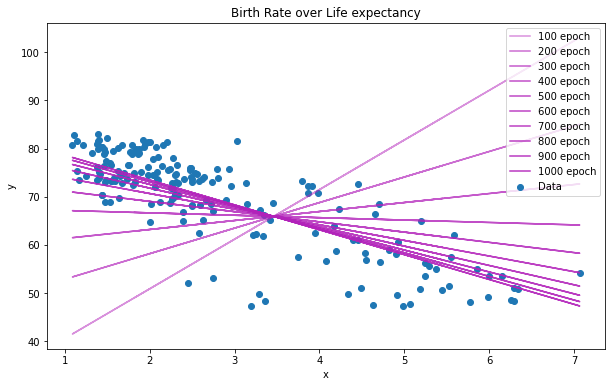

In [7]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(data_X,data_Y, label="Data")
for i in range(len(history)):
    ax.plot(data_X,history[i], c='#b222ba',label=str((i+1)*display_step)+" epoch", alpha = (i+1)/(i+2))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Birth Rate over Life expectancy')
ax.legend()